# ① 흥미로운 분류문제 선정   
: 종속/독립변수 선택

In [1]:
import pandas as pd
HD=pd.read_csv("https://raw.githubusercontent.com/ykjoy/mining/main/health_data.csv")
HD.head(5)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [2]:
# mglearn 라이브러리 설치
!pip install mglearn 
!pip install --upgrade joblib==1.1.0
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**matplotlib 한글깨짐 방지**  
참조 : https://teddylee777.github.io/colab/colab-korean


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [4]:
#라이브러리 설치하고 다시 돌려줘야 함
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

###데이터 전처리

이진 클래스로서 YES, NO로 판명할 수 있는 변수를 반응변수로 만들어야 한다고 생각했다.   
변수 중 식후 혈당을 기준으로 당뇨병을 진단할 수 있다는 사실을 알게되어  
**당뇨병을 진단**하는 설명변수들을 파악하는 분류모델을 만들어보기로 한다. 

**의사결정나무 만들기**  
당뇨병을 잘 분류할 수 있는 조건은 무엇일까? 

**당뇨병 유무의 이진 범주 데이터 열 만들기**  
공복혈당이 126 mg/dL 이상이면 당뇨로 판단

In [5]:
HD['당뇨']=0

HD.loc[(HD['식전혈당(공복혈당)']>=126),'당뇨']=1
HD.loc[(HD['식전혈당(공복혈당)']<126),'당뇨']=0

HD.head(5)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,당뇨
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,0


**비만율 변수 만들기**  
키, 몸무게는 서로 연관이 있는 자료이기 때문에  
몸무게가 높다고 비만이라고 판정할 수 없음, 키를 고려해야함  
표준화한 하나의 지표가 필요해보임   

BMI를 이용한 비만도 계산은 자신의 몸무게를 키의 제곱으로 나누는 것으로 공식은 kg/㎡.  
BMI가 18.5 이하면 저체중 ／ 18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중 ／ 25.0 이상부터는 비만으로 판정.  
ex) 키 170㎝에 몸무게 73kg이면, 계산식 : 73 / (1.7×1.7) = 25.26 → 과체중

https://www.oc.go.kr/health/contents.do?key=1487&

In [6]:
#비만율. 
HD['비만율']=HD['체중(5Kg 단위)']/HD['신장(5Cm단위)']/HD['신장(5Cm단위)']*10000 #cm를 m로 환산, 역수, 제곱 -> 10,000
HD.head(5)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,당뇨,비만율
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,0,22.038567
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0,28.888889
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0,22.892820
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1,27.343750
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,0,20.811655


**의사결정나무 코드를 돌릴 때 발생한 세 가지 문제**

코드를 돌리기 앞서   
데이터 전처리 시 마주했던 문제와 해결 과정을 기록한다. 



1.    **ValueError: could not convert string to float: 'F' 로부터**   
stirng을 float로 전환할 수 없다는 에러가 떴다.  
'F'에서 멈춘것으로 보아 성별 변수의 'F'에서 문제가 발생한 것 같다.  
문자형을 숫자형으로 변환할 수 없으면 의사결정나무를 사용할 수 없는 모양이다.  

  총 두 가지 해결방법이 있다.  

  ① 숫자로 라벨링 : 일일히 라벨링(1,2,3)을 하거나, 더미변수(01, 11, 10)화 하기  
  ② 문자열 데이터를 제외시키기 

  빠른 문제해결을 위해 문자열 데이터(성별, 흡연여부, 음주여부)는 분석에서 제외시켰다.  
  치아우식증 유무와 치석도 지표가 범주형으로, 처리하기 애매해서 제외시켰다. 



2.   **ValueError: Input contains NaN, infinity or a value too large for dtype('float32').**  
  자료가 결측치를 포함하거나, 아니면 지나치게 큰 값이 있어 처리하기 어렵다는 에러 메시지 같다. 
  이 자료의 경우 결측치에 대한 문제로  
  일괄적으로 결측치 행을 삭제해버리기로 했다. 

3.   **학습용데이터적합이 계속 1.00000000 이 나오는 건에 대해서**

  학습용 데이터 적합이 계속 100%가 나와서 당황스러웠다. 
  트리와 변수의 중요도를 확인해보았더니 '총콜레스테롤' 하나만 유의하고 나머지 변수의 중요도는 전부 0 으로 나오고 있었다. 
  
  현재 수강하고 있는 회귀분석론의 내용을 떠올리면서 일종의 과적합 상황이라고 추측했다. 그렇다면 자료를 설명하는 데이터가 지나치게 많다고 설명할 수 있을것이다.  한편으로는 다중공선성을 떠올렸다. 다중공선성이 존재하면 중복된 성격의 변수때문에 하나의 변수로만 자료 설명이 끝나고 나머지 변수는 유의하지 못하다는 잘못된 해석을 내놓게 된다. 

  적합하는 변수의 개수를 임의로 줄인 결과
  학습용데이터 적합이 항상 100%가 나오는 문제를 해결할 수 있었다.  
  가장 적절한 해결방법은 무엇인지 궁금하다. 

위 세 문제를 해결하고 일단 의사결정나무를 돌리는데 성공했다면  
다른 앙상블 모델을 돌리는데는 큰 문제가 없을것이다. 




In [7]:
#ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
#일괄적으로 결측치 삭제
HD=HD.dropna()

### 의사결정나무

In [8]:
HD.info()
#변수가 너무 많아서 과적합이 되었을수도 있다
#변수 개수를 좀 줄여야겠다. 

HD2=HD.loc[:,['당뇨','총콜레스테롤','비만율','혈색소','HDL콜레스테롤','감마지티피','허리둘레',
              '트리글리세라이드','혈청크레아티닌'
              ,'LDL콜레스테롤']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         1249 non-null   int64  
 1   가입자일련번호      1249 non-null   int64  
 2   시도코드         1249 non-null   int64  
 3   성별코드         1249 non-null   object 
 4   연령대코드(5세단위)  1249 non-null   int64  
 5   신장(5Cm단위)    1249 non-null   int64  
 6   체중(5Kg 단위)   1249 non-null   int64  
 7   허리둘레         1249 non-null   float64
 8   시력(좌)        1249 non-null   float64
 9   시력(우)        1249 non-null   float64
 10  청력(좌)        1249 non-null   int64  
 11  청력(우)        1249 non-null   int64  
 12  수축기혈압        1249 non-null   float64
 13  이완기혈압        1249 non-null   float64
 14  식전혈당(공복혈당)   1249 non-null   float64
 15  총콜레스테롤       1249 non-null   float64
 16  트리글리세라이드     1249 non-null   float64
 17  HDL콜레스테롤     1249 non-null   float64
 18  LDL콜레스테롤     1249 non-null   float64
 19  혈색소   

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

HD2.info()
x = HD2.iloc[:,1:] 
y = HD2['당뇨']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.25, random_state=42)
tree = DecisionTreeClassifier(criterion='gini',random_state=42)
tree.fit(x_train, y_train)
print("\n",'-----------------------------------------------------','\n')
print("학습용 데이터 정확도: {:.3f}".format(tree.score(x_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(x_test, y_test)))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   당뇨        1249 non-null   int64  
 1   총콜레스테롤    1249 non-null   float64
 2   비만율       1249 non-null   float64
 3   혈색소       1249 non-null   float64
 4   HDL콜레스테롤  1249 non-null   float64
 5   감마지티피     1249 non-null   float64
 6   허리둘레      1249 non-null   float64
 7   트리글리세라이드  1249 non-null   float64
 8   혈청크레아티닌   1249 non-null   float64
 9   LDL콜레스테롤  1249 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 107.3 KB

 ----------------------------------------------------- 

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.805


In [10]:
#과적합에 대해, depth 조정
tree = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
tree.fit(x_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(x_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(x_test, y_test)))

학습용 데이터 정확도: 0.903
시험용 데이터 정확도: 0.895


**나무 그리기**

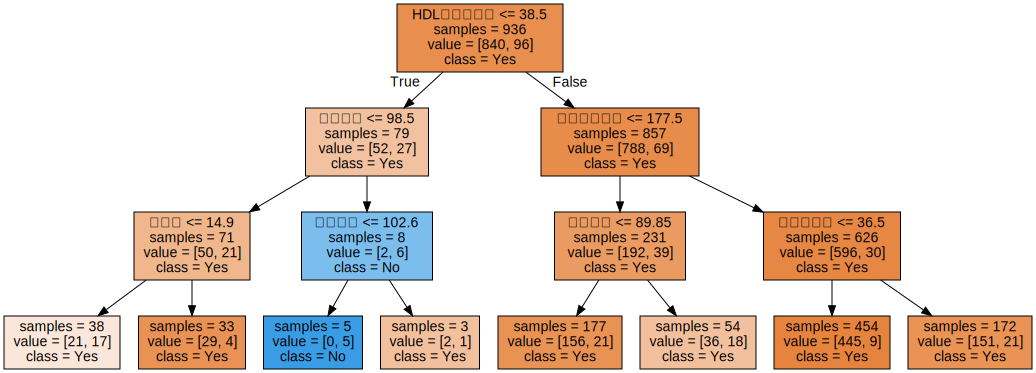

In [11]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Yes", "No"],
                feature_names=HD2.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#colab에서는 안깨지는데 github에서 보면 깨지네요.. 

**주요변수들**

In [12]:
result = tree.feature_importances_
print("변수의 중요도:", result)

변수의 중요도: [0.16654235 0.         0.12685306 0.3333373  0.08808667 0.28518062
 0.         0.         0.        ]


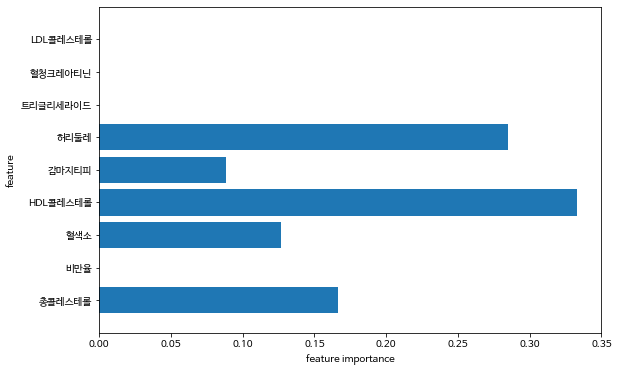

In [13]:
import numpy as np

def plot_feature_importances_HD2(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(HD2.columns[1:])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), HD2.columns[1:])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_HD2(tree)

HDL콜레스테롤, 허리둘레, 콜레스테롤, 혈색소, 감마지티피 순으로 유의하다. 

##분류모델 : 앙상블 모델

###랜덤포레스트###

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


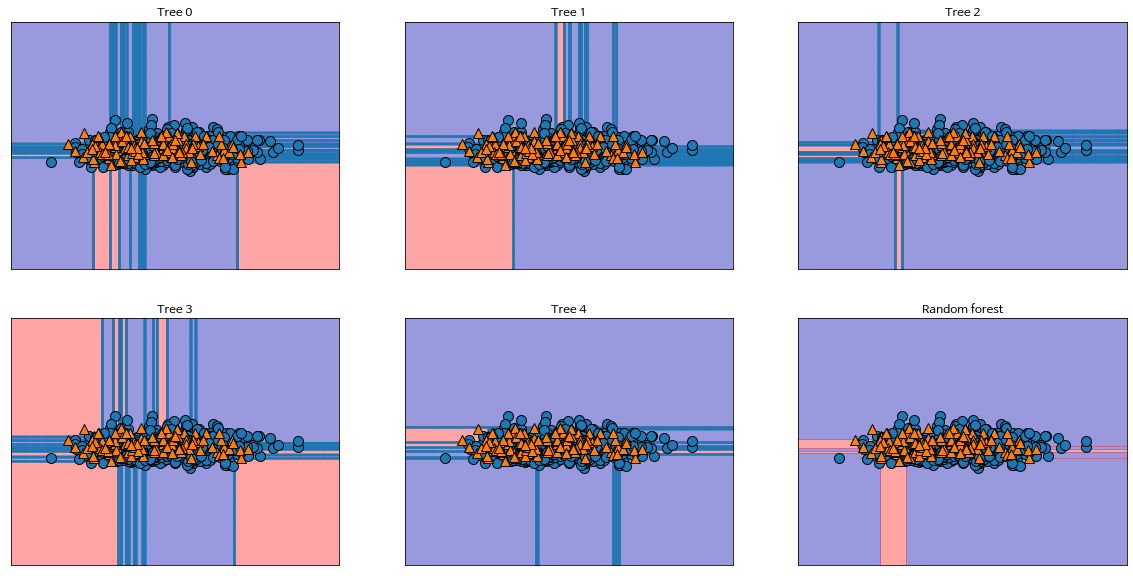

In [14]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=5,random_state=0)
#max_depth의 경우 최적의 값이 설정되어있어 임의로 옵션추가할 필요는 없다고 함.
forest.fit(x_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(x.iloc[:, 0], x.iloc[:, 1], y)
plt.show()



In [15]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.81914894 0.82978723 0.84042553 0.80851064 0.87234043 0.85106383
 0.84946237 0.83870968 0.82795699 0.84946237]
Random forest:  [0.88297872 0.86170213 0.88297872 0.87234043 0.89361702 0.90425532
 0.89247312 0.88172043 0.87096774 0.90322581]
Accuracy mean
Decision tree :0.839
Random forest :0.885


In [16]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
#왜 max_depth 옵션이 입력이 안될까?? 
forest.fit(x_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.891


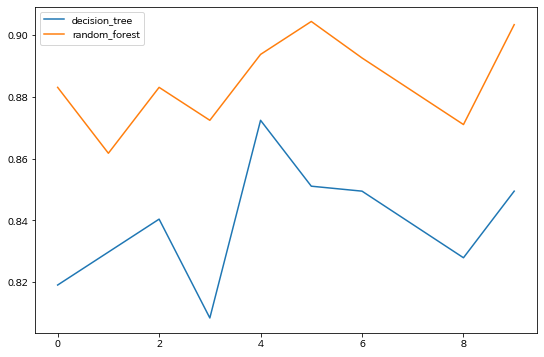

In [17]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

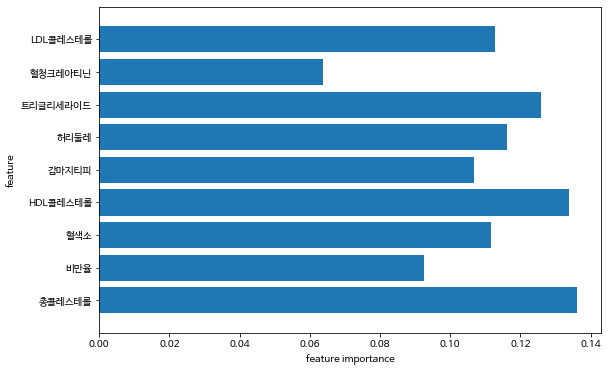

In [18]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
# 물리적으로..?
plot_feature_importances_HD2(forest)

총콜레스테롤, HDL콜레스테롤, 크리글리세라이드, LDL콜레스테롤, 허리둘레 순서대로 유의하다.



###그래디언트 부스팅

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [20]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

학습용 데이터 세트 정확도: 0.951
시험용 데이터 세트 정확도: 0.895


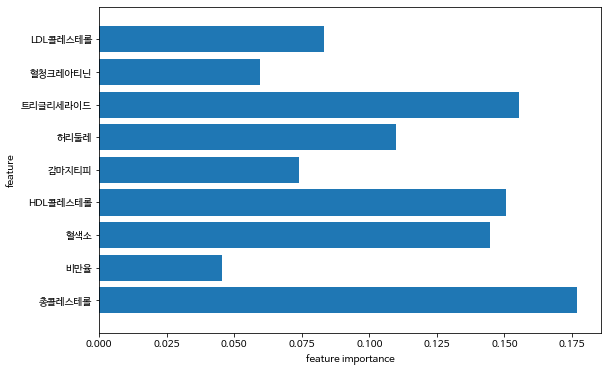

In [21]:
plot_feature_importances_HD2(gbrt)

총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, 혈색소, LDL콜레스테롤 순으로 유의하다. 

###XG부스팅

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3,random_state=0)
xgb.fit(x_train, y_train)
y_preds = xgb.predict(x_test)

#성능 평가
print("학습용 데이터 세트 정확도: {:.3f}".format(xgb.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(xgb.score(x_test, y_test)))



학습용 데이터 세트 정확도: 0.936
시험용 데이터 세트 정확도: 0.891


# ② 모델 선택

**의사결정나무 정확도**  
학습용 데이터 정확도: 0.903  
시험용 데이터 정확도: 0.895

**랜덤포레스트 정확도**  
학습용 데이터 세트 정확도: 1.000  
시험용 데이터 세트 정확도: 0.891

-> 그래프에서는 랜덤포레스트가 의사결정나무보다 높았는데  
수치로는 의사결정나무보다 랜덤포레스트 정확도가 낮게 나오는 이유를 모르겠다.

**그래디언트 부스트 정확도**  
학습용 데이터 세트 정확도: 0.951  
시험용 데이터 세트 정확도: 0.895

**XG부스트**  
학습용 데이터 세트 정확도: 0.936  
시험용 데이터 세트 정확도: 0.891



위 결과로 미루어  
**그래디언트 부스트**방법을 채택하기로 한다. 